In [1]:
from selenium import webdriver
from selenium.webdriver.support.select import Select
from selenium import webdriver
from selenium.webdriver.support.select import Select
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.keys import Keys
import random
import time
import pandas as pd
import requests
import bs4

In [2]:
df_Reviews = pd.read_json('reviews.json')

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import HTML
df_Reviews['Rating'].value_counts()


5.0    542
4.0    115
1.0     79
3.0     53
2.0     51
Name: Rating, dtype: int64

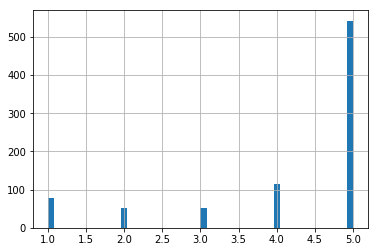

In [5]:
df_Reviews['Rating'].hist(bins=50)

In [7]:
df_Reviews['Format'].value_counts()

Pattern: LED Flashlight 2P    745
Pattern: 4 pack                68
Pattern: 6 pack                27
Name: Format, dtype: int64

In [9]:
df_Reviews['Review_body'][18]

'Wow.  Nicely made.  Work very well with Li Ion 14500 batteries as well as with AA alkaline (of course dimmer).  Not hard to get used to the (stupid) inclusion of Strobe Mode.  They automatically cycle from mode to mode each time you turn them off/on with the tail switch.  Hint to make your life easier (such as it is): When (not if) it turns on automatically (every third time) in strobe mode, just gently push down slightly once or twice on the switch to make it cycle between modes to get what you want.  Instead of "jumping up and down, screaming and shouting", just think ZEN thoughts (Ooooommmm.  All is beauty) and gently depress the switch.And think of the amazingness of this: A bright (and cheap and well-made) LED flashlight that operates on one lousy battery at 1 1/2 volts (yes, even cheap light "heavy duty" non-alkalines) or an NiMH rechargeable at 1.35 volts and yet is still not destroyed by 3.7 volt Li Ion\'s.  Would I be as enthusiastic if I\'d not got them on sale at 6.99?  Wel

In [10]:
df_Reviews_with_review_len = df_Reviews

In [11]:
df_Reviews_with_review_len['Review_length'] = df_Reviews_with_review_len.Review_body.apply(lambda x: len(x))

In [13]:
df_Reviews_with_review_len.Review_length.describe()

count     840.000000
mean      156.911905
std       197.870310
min         4.000000
25%        39.000000
50%        94.500000
75%       203.250000
max      2420.000000
Name: Review_length, dtype: float64

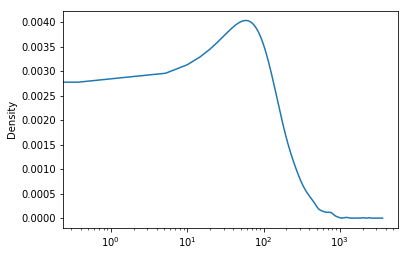

In [14]:
df_Reviews_with_review_len.Review_length.plot(kind='kde', logx=True)

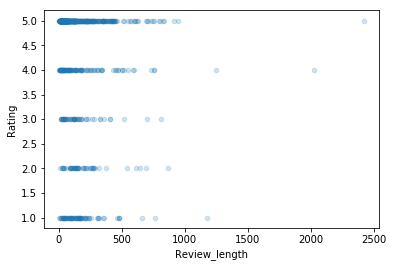

In [15]:
df_Reviews_with_review_len.plot(kind="scatter", x="Review_length", y="Rating", alpha = 0.2)

In [16]:
df_Reviews_with_review_len['Format_type'] = df_Reviews_with_review_len.Format.apply(lambda x: 0 if '2P' in x else(1 if '4' in x else 2))

In [17]:
df_Reviews_with_review_len.Format_type.value_counts()

0    745
1     68
2     27
Name: Format_type, dtype: int64

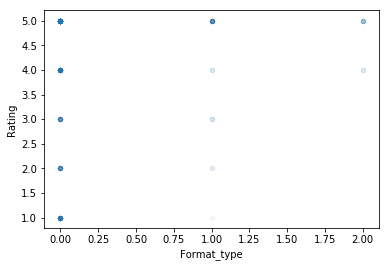

In [18]:
df_Reviews_with_review_len.plot(kind="scatter", x="Format_type", y="Rating", alpha = 0.025)

In [19]:
df_temp = df_Reviews_with_review_len.sort_values(by = 'Format_type', axis = 0 , ascending= True )

In [20]:
df_type_0 = df_temp.iloc[0:745,[1,8] ]

In [22]:
df_type_0.Rating.describe()

count    745.000000
mean       4.143624
std        1.362730
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [23]:
df_type_1 = df_temp.iloc[745:745+68,[1,8] ]

In [25]:
df_type_1.Rating.describe()

count    68.000000
mean      4.323529
std       1.125567
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Rating, dtype: float64

In [26]:
df_type_2 = df_temp.iloc[745+68:745+68+27,[1,8] ]

In [28]:
df_type_2.Rating.describe()

count    27.000000
mean      4.777778
std       0.423659
min       4.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Rating, dtype: float64

In [30]:
# for i in range(len(df_Reviews)):
df_Reviews.Review_body = df_Reviews.Title.str.cat(df_Reviews.Review_body,sep='. ')

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase=True)

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction import stop_words

import bs4
import pandas as pd
import spacy

from gensim.models.phrases import Phrases, Phraser
from spacy.pipeline import Pipe

nlp = spacy.load('en')
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import gensim


C:\ProgramData\Anaconda3\envs\scraping\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [33]:
class PartOfSpeechFilter(BaseEstimator, TransformerMixin):
    def __init__(self, pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'), stop_words=None):
        self.pos_to_keep = pos_to_keep
        self.stop_words = stop_words
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        preprocessed_sentences = []
        
        for doc in nlp.pipe(X, n_threads=8):
            if self.stop_words is not None:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep and t.lemma_ not in self.stop_words])
            else:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep])
            preprocessed_sentences.append(keep_tokens_string)
    
        return preprocessed_sentences

In [34]:
x = df_Reviews.loc[:, 'Review_body']
y = df_Reviews.loc[:, 'Rating']

In [35]:
class CleanHTML(BaseEstimator, TransformerMixin):
    def __init__(self, parser='html5lib'):
        self.parser = parser
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.apply(lambda review: bs4.BeautifulSoup(review, self.parser).get_text())

In [266]:


ch = CleanHTML()
cleaned_reviews = ch.fit_transform(x)




In [37]:
pd.value_counts(y)

5.0    542
4.0    115
1.0     79
3.0     53
2.0     51
Name: Rating, dtype: int64

In [38]:
review_lengths = cleaned_reviews.apply(lambda r: len(r))
review_lengths.describe()

count     840.000000
mean      182.192857
std       205.130340
min        11.000000
25%        53.000000
50%       120.500000
75%       238.250000
max      2455.000000
Name: Review_body, dtype: float64

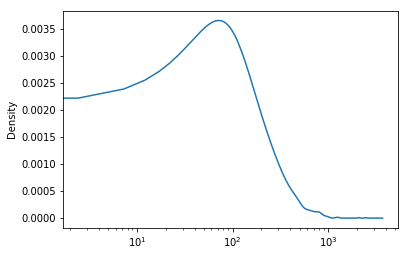

In [39]:


review_lengths.plot(kind='kde', logx=True)




In [40]:
common_terms = list(stop_words.ENGLISH_STOP_WORDS) + ["'m", "'re", "'ll", "'s", "'ve", "'d", 'ca', 'is','-PRON-','star']

In [41]:
common_terms.remove('not')
common_terms.remove('nothing')
common_terms.remove('never')
common_terms.remove('cant')
common_terms.remove('cannot')
common_terms.remove('couldnt')
common_terms.remove('no')
common_terms.remove('none')
common_terms.remove('one')
common_terms.remove('two')
common_terms.remove('three')
common_terms.remove('four')
common_terms.remove('five')
common_terms.remove('hasnt')
common_terms.remove('few')
common_terms.remove('only')

In [43]:


pipeline = Pipeline([('posf', PartOfSpeechFilter()),
                     ('cv', CountVectorizer())
                   ])

pipeline.set_params(**{'posf__stop_words': common_terms})
# this is equivalent to pipeline.set_params(posf__stop_words=None), read about the * operator in python and what it does
# https://medium.com/understand-the-python/understanding-the-asterisk-of-python-8b9daaa4a558
pipeline.set_params(cv__max_df=0.95, cv__min_df=0.01)

preproc_reviews = pipeline.fit_transform(cleaned_reviews)



In [44]:
preproc_reviews

<840x189 sparse matrix of type '<class 'numpy.int64'>'
	with 6510 stored elements in Compressed Sparse Row format>

In [45]:


pipeline.named_steps



{'cv': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.95, max_features=None, min_df=0.01,
         ngram_range=(1, 1), preprocessor=None, stop_words=None,
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'posf': PartOfSpeechFilter(pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'),
           stop_words=['how', 'via', 'due', 'yet', 'or', 'ever', 'rather', 'latter', 'out', 'which', 'during', 'fifteen', 'full', 'in', 'itself', 'onto', 'some', 'our', 'afterwards', 'must', 'sixty', 'mine', 'but', 'except', 'herself', 'themselves', 'there', 'otherwise', 'why', 'part', 'you', 'are', 'upon', 'c...', 'if', 'throughout', 'about', "'m", "'re", "'ll", "'s", "'ve", "'d", 'ca', 'is', '-PRON-', 'star'])}

In [46]:


pipe_cv = pipeline.named_steps['cv']



In [47]:


preproc_reviews.shape



(840, 189)

In [48]:


sum_across_rows = preproc_reviews.sum(axis=1)
print('Shape of result: ', sum_across_rows.shape)
sum_across_rows[:10]



Shape of result:  (840, 1)


matrix([[ 3],
        [11],
        [10],
        [ 2],
        [ 9],
        [11],
        [ 5],
        [15],
        [ 3],
        [18]], dtype=int64)

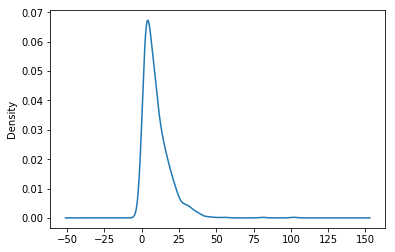

In [49]:


pd.Series(sum_across_rows.A1).plot(kind='kde')



In [50]:



sum_down_columns = preproc_reviews.sum(axis=0)
sum_down_columns.shape



(1, 189)

In [51]:


counts_per_word = list(zip(pipe_cv.get_feature_names(), sum_down_columns.A1))
sorted(counts_per_word, key=lambda t: t[1], reverse=True)[:10]

[('flashlight', 522),
 ('light', 494),
 ('bright', 381),
 ('great', 362),
 ('good', 270),
 ('work', 266),
 ('battery', 232),
 ('small', 201),
 ('use', 190),
 ('little', 173)]

In [52]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate


In [53]:


lr = LogisticRegression()

lr.fit(preproc_reviews, y)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
lr.score(preproc_reviews, y)

0.85357142857142854

In [55]:
# training_test = x.sample(5, random_state=42)
# training_test_labels = y.loc[training_test.index]

In [56]:
# preproc_training_test = pipeline.transform(training_test)

In [57]:
# lr.score(preproc_training_test, training_test_labels)

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
import numpy as np

np.linspace(1e-5, 1e5, 10)

array([  1.00000000e-05,   1.11111111e+04,   2.22222222e+04,
         3.33333333e+04,   4.44444445e+04,   5.55555556e+04,
         6.66666667e+04,   7.77777778e+04,   8.88888889e+04,
         1.00000000e+05])

In [60]:
# use the parameter grid to set all the values you want to test, GridSearchCV will iterate through every possible combination.

param_grid = {'C': np.linspace(1e-5, 1e5, 10), 'penalty': ['l1', 'l2']}

grid = GridSearchCV(lr, param_grid=param_grid, cv=10, n_jobs=-1)

In [61]:


grid.fit(preproc_reviews, y)



GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-05,   1.11111e+04,   2.22222e+04,   3.33333e+04,
         4.44444e+04,   5.55556e+04,   6.66667e+04,   7.77778e+04,
         8.88889e+04,   1.00000e+05]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [62]:


grid.best_params_



{'C': 1.0000000000000001e-05, 'penalty': 'l2'}

In [63]:

grid.cv_results_['mean_test_score']

array([ 0.09404762,  0.6452381 ,  0.58214286,  0.61309524,  0.59642857,
        0.60714286,  0.59047619,  0.60595238,  0.58928571,  0.60357143,
        0.59166667,  0.60595238,  0.58809524,  0.60357143,  0.58809524,
        0.60119048,  0.58809524,  0.6       ,  0.58809524,  0.60238095])

In [64]:
from sklearn.svm import SVC

In [65]:


svc = SVC()

scores_svc = cross_validate(svc, preproc_reviews, y, cv=10,scoring=['accuracy'], n_jobs=-1)



In [66]:


scores_svc



{'fit_time': array([ 0.05146217,  0.06616569,  0.06104255,  0.04685426,  0.04690409,
         0.04688072,  0.0624752 ,  0.04687858,  0.06253576,  0.06253576]),
 'score_time': array([ 0.01562881,  0.0060246 ,  0.00501347,  0.01562929,  0.        ,
         0.        ,  0.        ,  0.        ,  0.01559782,  0.        ]),
 'test_accuracy': array([ 0.63218391,  0.63953488,  0.63529412,  0.64285714,  0.64285714,
         0.65060241,  0.65060241,  0.65060241,  0.65060241,  0.67073171]),
 'train_accuracy': array([ 0.64940239,  0.64986737,  0.65298013,  0.65343915,  0.64814815,
         0.64993395,  0.65125495,  0.64861295,  0.64861295,  0.64907652])}

In [67]:


from sklearn.ensemble import RandomForestClassifier



In [92]:


rf = RandomForestClassifier()

scores_rf = cross_validate(rf, preproc_reviews, y, cv=10, n_jobs=-1, scoring=['accuracy'], return_train_score=True)

scores_rf



{'fit_time': array([ 0.02706575,  0.02807522,  0.02807474,  0.02807546,  0.03008366,
         0.0330565 ,  0.0280745 ,  0.03606439,  0.0280776 ,  0.03208351]),
 'score_time': array([ 0.00200534,  0.0020051 ,  0.00100279,  0.00198054,  0.00197721,
         0.0020051 ,  0.00200629,  0.00100255,  0.00200081,  0.00100255]),
 'test_accuracy': array([ 0.66666667,  0.65116279,  0.69411765,  0.69047619,  0.69047619,
         0.74698795,  0.74698795,  0.73493976,  0.65060241,  0.70731707]),
 'train_accuracy': array([ 0.98007968,  0.9801061 ,  0.97615894,  0.98544974,  0.98280423,
         0.97754293,  0.97225892,  0.97754293,  0.98150594,  0.98153034])}

In [93]:
scores_rf['test_accuracy'].mean()

0.69797346308354336

In [206]:

lr = LogisticRegression(C=0.3,penalty = 'l2',solver='newton-cg',multi_class = 'multinomial' )
#  {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
#  str, {‘ovr’, ‘multinomial’}
scores_lr = cross_validate(lr, preproc_reviews, y, cv=10, 
                        scoring=['accuracy'],
                        return_train_score=True
                       )
print(scores_lr)

scores_lr['test_accuracy'].mean()

{'fit_time': array([ 0.05013347,  0.04511905,  0.05417752,  0.04511786,  0.04412127,
        0.04010606,  0.04712582,  0.04211211,  0.04712248,  0.04210973]), 'score_time': array([ 0.        ,  0.00100327,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00100493,  0.        ,  0.00100255]), 'test_accuracy': array([ 0.68965517,  0.73255814,  0.76470588,  0.72619048,  0.72619048,
        0.77108434,  0.73493976,  0.78313253,  0.72289157,  0.67073171]), 'train_accuracy': array([ 0.84063745,  0.83687003,  0.8397351 ,  0.83465608,  0.83862434,
        0.8348745 ,  0.84015852,  0.82694848,  0.83619551,  0.83113456])}


0.73220800467707281

In [208]:
lr = LogisticRegression(C=0.625,penalty = 'l2',solver='liblinear' )
#  {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
#  str, {‘ovr’, ‘multinomial’}
scores_lr = cross_validate(lr, preproc_reviews, y, cv=10, 
                        scoring=['accuracy'],
                        return_train_score=True
                       )
print(scores_lr)

scores_lr['test_accuracy'].mean()

{'fit_time': array([ 0.00901365,  0.00902319,  0.0100255 ,  0.01102877,  0.0080204 ,
        0.01102877,  0.01005816,  0.01202273,  0.00903034,  0.00901794]), 'score_time': array([ 0.00100327,  0.        ,  0.        ,  0.00100327,  0.        ,
        0.        ,  0.0010016 ,  0.00100255,  0.        ,  0.        ]), 'test_accuracy': array([ 0.70114943,  0.72093023,  0.77647059,  0.71428571,  0.71428571,
        0.77108434,  0.73493976,  0.79518072,  0.73493976,  0.67073171]), 'train_accuracy': array([ 0.84727756,  0.85145889,  0.84900662,  0.84126984,  0.8505291 ,
        0.84147952,  0.85204756,  0.84015852,  0.84412153,  0.84828496])}


0.73339979602825456

In [167]:
rf2 = RandomForestClassifier(n_estimators= 65, max_depth=None, min_samples_split=2,
                                  min_samples_leaf=5,max_features= 90, max_leaf_nodes = None,oob_score=True, random_state=10)

scores_rf2 = cross_validate(rf2, preproc_reviews, y, cv=10, n_jobs=-1, scoring=['accuracy'], return_train_score=True)


print(scores_rf2['test_accuracy'].mean())
scores_rf2

0.715916408877


{'fit_time': array([ 0.19723964,  0.20314598,  0.2102592 ,  0.21874356,  0.20314908,
         0.20314693,  0.20312238,  0.23437285,  0.23437285,  0.21874809]),
 'score_time': array([ 0.01565552,  0.01563239,  0.01562905,  0.        ,  0.        ,
         0.01562977,  0.01563072,  0.        ,  0.01565218,  0.        ]),
 'test_accuracy': array([ 0.64367816,  0.6744186 ,  0.74117647,  0.71428571,  0.71428571,
         0.73493976,  0.78313253,  0.73493976,  0.69879518,  0.7195122 ]),
 'train_accuracy': array([ 0.74900398,  0.76525199,  0.75761589,  0.77116402,  0.75529101,
         0.76221929,  0.75825627,  0.76486129,  0.75957728,  0.75725594])}

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tfidf = TfidfVectorizer(lowercase=True, norm='l1', stop_words='english', use_idf=False)

In [74]:
common_terms_tfidf = common_terms + ['flashlight','light']

In [75]:
pipeline_tfidf = Pipeline([('posf', PartOfSpeechFilter()),
                     ('tfidf', TfidfVectorizer())
                   ])

pipeline_tfidf.set_params(**{'posf__stop_words': common_terms_tfidf})
# this is equivalent to pipeline.set_params(posf__stop_words=None), read about the * operator in python and what it does
# https://medium.com/understand-the-python/understanding-the-asterisk-of-python-8b9daaa4a558
pipeline.set_params(cv__max_df=0.95, cv__min_df=0.01)

preproc_reviews_tfidf = pipeline_tfidf.fit_transform(cleaned_reviews)

In [76]:
pipeline_tfidf.named_steps



{'posf': PartOfSpeechFilter(pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB'),
           stop_words=['how', 'via', 'due', 'yet', 'or', 'ever', 'rather', 'latter', 'out', 'which', 'during', 'fifteen', 'full', 'in', 'itself', 'onto', 'some', 'our', 'afterwards', 'must', 'sixty', 'mine', 'but', 'except', 'herself', 'themselves', 'there', 'otherwise', 'why', 'part', 'you', 'are', 'upon', 'c...'about', "'m", "'re", "'ll", "'s", "'ve", "'d", 'ca', 'is', '-PRON-', 'star', 'flashlight', 'light']),
 'tfidf': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents=None, sublinear_tf=False,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
         vocabulary=None)}

In [77]:
pipe_tfidf = pipeline_tfidf.named_steps['tfidf']

In [78]:


preproc_reviews_tfidf.shape

(840, 1641)

In [79]:
preproc_reviews_tfidf

<840x1641 sparse matrix of type '<class 'numpy.float64'>'
	with 8705 stored elements in Compressed Sparse Row format>

In [80]:
sum_across_rows_tfidf= preproc_reviews_tfidf.sum(axis=1)
print('Shape of result: ', sum_across_rows_tfidf.shape)


Shape of result:  (840, 1)


In [81]:
sum_across_rows_tfidf[:10]


matrix([[ 2.15204071],
        [ 3.59865816],
        [ 2.91243531],
        [ 1.        ],
        [ 1.86626251],
        [ 2.68730502],
        [ 1.67531381],
        [ 4.8272121 ],
        [ 1.69734972],
        [ 3.29617429]])

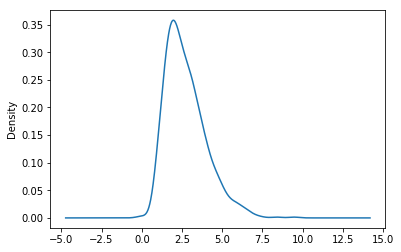

In [82]:
pd.Series(sum_across_rows_tfidf.A1).plot(kind='kde')


In [83]:
sum_down_columns_tfidf = preproc_reviews_tfidf.sum(axis=0)
sum_down_columns_tfidf.shape



(1, 1641)

In [84]:
counts_per_word_tfidf = list(zip(pipe_tfidf.get_feature_names(), sum_down_columns_tfidf.A1))
sorted(counts_per_word_tfidf, key=lambda t: t[1], reverse=True)[:10]

[('great', 71.586551626337084),
 ('bright', 55.72503587856275),
 ('good', 51.088671797089802),
 ('work', 48.265399646395743),
 ('little', 34.556350552987716),
 ('small', 32.101183921538194),
 ('price', 30.5509753112091),
 ('battery', 30.045717535066068),
 ('stars', 26.724689967494324),
 ('use', 25.24686537140748)]

In [85]:
grid.fit(preproc_reviews_tfidf, y)


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-05,   1.11111e+04,   2.22222e+04,   3.33333e+04,
         4.44444e+04,   5.55556e+04,   6.66667e+04,   7.77778e+04,
         8.88889e+04,   1.00000e+05]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [86]:
grid.best_params_


{'C': 11111.11112, 'penalty': 'l2'}

In [87]:
grid.cv_results_['mean_test_score']

array([ 0.09404762,  0.6452381 ,  0.65119048,  0.67857143,  0.64880952,
        0.67142857,  0.64761905,  0.67261905,  0.64285714,  0.66904762,
        0.63928571,  0.66785714,  0.64404762,  0.6702381 ,  0.64285714,
        0.6702381 ,  0.63809524,  0.67261905,  0.64047619,  0.67261905])

In [88]:
scores_svc_tfidf = cross_validate(svc, preproc_reviews_tfidf, y, cv=10,scoring=['accuracy'], n_jobs=-1)
scores_svc_tfidf

{'fit_time': array([ 0.05272841,  0.05414367,  0.05213237,  0.05034518,  0.05036998,
         0.05313993,  0.06248212,  0.04687691,  0.04687691,  0.04687691]),
 'score_time': array([ 0.00515509,  0.00701833,  0.0059936 ,  0.00599265,  0.00601625,
         0.00501299,  0.        ,  0.        ,  0.        ,  0.01563025]),
 'test_accuracy': array([ 0.63218391,  0.63953488,  0.63529412,  0.64285714,  0.64285714,
         0.65060241,  0.65060241,  0.65060241,  0.65060241,  0.65853659]),
 'train_accuracy': array([ 0.64674635,  0.64588859,  0.64635762,  0.64550265,  0.64550265,
         0.64464993,  0.64464993,  0.64464993,  0.64464993,  0.64379947])}

In [248]:

rf2 = RandomForestClassifier(n_estimators= 65, max_depth=None, min_samples_split=2,
                                  min_samples_leaf=2, max_features= 500, max_leaf_nodes = None,oob_score=True, random_state=10)

scores_rf2_tfidf = cross_validate(rf, preproc_reviews_tfidf, y, cv=10, n_jobs=-1, scoring=['accuracy'], return_train_score=True)


print(scores_rf2_tfidf['test_accuracy'].mean())
scores_rf2_tfidf

0.707595730634


{'fit_time': array([ 0.06113172,  0.05715203,  0.0551405 ,  0.05815434,  0.05614758,
         0.05416727,  0.05314064,  0.0531354 ,  0.05517244,  0.05517244]),
 'score_time': array([ 0.00200653,  0.00200558,  0.00100255,  0.00200558,  0.00100374,
         0.00200939,  0.00200582,  0.00100327,  0.00100327,  0.00200486]),
 'test_accuracy': array([ 0.64367816,  0.6627907 ,  0.72941176,  0.70238095,  0.67857143,
         0.75903614,  0.71084337,  0.75903614,  0.72289157,  0.70731707]),
 'train_accuracy': array([ 0.98007968,  0.98408488,  0.98675497,  0.98809524,  0.98412698,
         0.98018494,  0.98546896,  0.97754293,  0.98414795,  0.98548813])}

In [265]:

lr_tfidf = LogisticRegression(C=5,penalty = 'l2',solver='liblinear' )
#  {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
#  str, {‘ovr’, ‘multinomial’}



scores_lr_tfidf = cross_validate(lr_tfidf, preproc_reviews_tfidf, y, cv=10, 
                        scoring=['accuracy'],
                        return_train_score=True
                       )

print(scores_lr_tfidf)
scores_lr_tfidf['test_accuracy'].mean()

{'fit_time': array([ 0.01306486,  0.00802088,  0.01005745,  0.01203132,  0.01102901,
        0.00905466,  0.00902438,  0.00902343,  0.00801754,  0.00900388]), 'score_time': array([ 0.        ,  0.00100279,  0.00100374,  0.        ,  0.        ,
        0.        ,  0.00100327,  0.        ,  0.        ,  0.        ]), 'test_accuracy': array([ 0.67816092,  0.69767442,  0.74117647,  0.73809524,  0.70238095,
        0.74698795,  0.75903614,  0.79518072,  0.72289157,  0.70731707]), 'train_accuracy': array([ 0.92961487,  0.92970822,  0.92715232,  0.92857143,  0.93253968,
        0.92866579,  0.9339498 ,  0.93130779,  0.92998679,  0.93403694])}


0.72889014579222067

In [91]:
text = df_Reviews.sample(840, random_state=42).loc[:, 'Review_body'].apply(lambda t: bs4.BeautifulSoup(t, 'lxml').get_text())

In [92]:
print(text.iloc[1])

Five Stars. MUY BUEN PRODUCTO


In [93]:
len(text)

840

In [94]:


%%time
token_text = []

for doc in nlp.pipe(text):
    for sent in doc.sents:
        token_text.append([t.lower_ for t in sent if not t.is_punct])



Wall time: 6.35 s


In [95]:
len(token_text)

3311

In [97]:


phrases = Phrases(token_text, common_terms=common_terms)
colloc = Phraser(phrases)
colloc_text = colloc[token_text]

In [98]:
colloc_text[1797]

['would', 'definitely', 'buy', 'again']

In [99]:
len(colloc_text)

3311

In [100]:
tri_phrases = Phrases(colloc_text, common_terms=common_terms)
tri_colloc = Phraser(tri_phrases)
tri_colloc_text = tri_colloc[colloc_text]




In [101]:
tri_colloc_text[999]

['very',
 'bright',
 'and',
 'portable',
 ' ',
 'will',
 'use',
 'in',
 'the',
 'car',
 'as',
 'a',
 'light',
 'for',
 'maps',
 'task',
 'lighting',
 'or',
 'emergencies',
 ' ']

In [102]:
common_terms_word2Vec = common_terms + [' ','one','two','three','four','five','$','=','1','2','3','4','5','6','7','8','9','0']
sentences = [[] for i in range(len(tri_colloc_text))]
for i in range(len(tri_colloc_text)):
    for x in tri_colloc_text[i]:
        if x not in common_terms_word2Vec:
            sentences[i].append(x)
            

In [103]:
tri_colloc_text[999]

['very',
 'bright',
 'and',
 'portable',
 ' ',
 'will',
 'use',
 'in',
 'the',
 'car',
 'as',
 'a',
 'light',
 'for',
 'maps',
 'task',
 'lighting',
 'or',
 'emergencies',
 ' ']

In [104]:
sentences[999]

['bright',
 'portable',
 'use',
 'car',
 'light',
 'maps',
 'task',
 'lighting',
 'emergencies']

In [106]:
from gensim.models import Word2Vec

In [107]:
%%time

model = Word2Vec(sentences, size=100, workers=8)

Wall time: 85.2 ms


In [108]:


model.wv.most_similar('flashlight')



[('light', 0.9971706867218018),
 ('not', 0.9968585968017578),
 ('only', 0.9958887696266174),
 ('just', 0.9958651661872864),
 ('mode', 0.995661735534668),
 ('modes', 0.9954941272735596),
 ('turn', 0.9952200055122375),
 ('like', 0.9951819181442261),
 ('bright', 0.9951685667037964),
 ('great', 0.9951624274253845)]

In [109]:
vocab = pd.Series(list(model.wv.vocab))
vocab_vectors = []

for word in vocab:
    try:
        vec = model.wv[word]
        vocab_vectors.append(vec)
    except:
        pass

In [112]:
len(vocab), len(vocab_vectors)

(474, 474)

In [113]:
vocab_vectors[0]

array([ -7.70837651e-04,  -4.49987128e-04,   1.10400957e-03,
        -7.71760475e-04,   1.84180180e-03,   2.47131102e-03,
        -5.00384951e-03,  -3.53991729e-03,  -1.03130820e-03,
         3.16700735e-03,  -3.37234442e-03,   4.06417297e-03,
        -3.35654197e-03,   1.53088616e-03,   3.46930465e-03,
        -1.32679276e-03,  -2.21880083e-03,   3.46876960e-03,
        -4.53566713e-03,   6.10850425e-03,   5.56503795e-03,
         6.22381922e-04,  -9.81848454e-04,   9.25789820e-04,
         5.23336092e-03,  -2.73136236e-03,   5.84510795e-04,
         3.73832136e-03,  -3.69056012e-03,  -6.67591055e-04,
         3.85808526e-03,   3.29257827e-03,   2.74338713e-03,
        -3.67698120e-03,   2.58244807e-03,   4.30744374e-03,
        -2.42585484e-05,  -4.63421084e-03,   1.61530823e-03,
         3.79392016e-03,   4.49206913e-03,  -1.73610682e-03,
        -1.10136496e-03,  -5.49965864e-03,  -3.04936827e-03,
        -1.37298822e-03,  -2.21029011e-04,   3.08153452e-03,
         4.90951398e-03,

In [115]:
import numpy as np

from sklearn.preprocessing import normalize

In [116]:


vector_array = np.concatenate(vocab_vectors, axis=0).reshape(-1, 100)

vec_array_l1 = normalize(vector_array, norm='l1')
vec_array_l2 = normalize(vector_array, norm='l2')







In [117]:


vector_array[0, :]



array([ -7.70837651e-04,  -4.49987128e-04,   1.10400957e-03,
        -7.71760475e-04,   1.84180180e-03,   2.47131102e-03,
        -5.00384951e-03,  -3.53991729e-03,  -1.03130820e-03,
         3.16700735e-03,  -3.37234442e-03,   4.06417297e-03,
        -3.35654197e-03,   1.53088616e-03,   3.46930465e-03,
        -1.32679276e-03,  -2.21880083e-03,   3.46876960e-03,
        -4.53566713e-03,   6.10850425e-03,   5.56503795e-03,
         6.22381922e-04,  -9.81848454e-04,   9.25789820e-04,
         5.23336092e-03,  -2.73136236e-03,   5.84510795e-04,
         3.73832136e-03,  -3.69056012e-03,  -6.67591055e-04,
         3.85808526e-03,   3.29257827e-03,   2.74338713e-03,
        -3.67698120e-03,   2.58244807e-03,   4.30744374e-03,
        -2.42585484e-05,  -4.63421084e-03,   1.61530823e-03,
         3.79392016e-03,   4.49206913e-03,  -1.73610682e-03,
        -1.10136496e-03,  -5.49965864e-03,  -3.04936827e-03,
        -1.37298822e-03,  -2.21029011e-04,   3.08153452e-03,
         4.90951398e-03,

In [118]:
len(vec_array_l2)

474

In [119]:
vec_array_l1[1].sum()

0.17006439

In [120]:
vocab[0]

'five_stars'

In [121]:
text_word2Vec = df_Reviews.loc[:, 'Review_body'].apply(lambda t: bs4.BeautifulSoup(t, 'lxml').get_text())

In [123]:
reviews_word2Vec = [[]for i in range(len(text_word2Vec)) ]

    

In [124]:
token_text_word2Vec = []
for i in range(len(text_word2Vec)):
    doc = nlp(text_word2Vec[i])
    for sent in doc.sents:
#             token_text_word2Vec.append([t.lower_ for t in sent if not t.is_punct])
        reviews_word2Vec[i].append([t.lower_ for t in sent if not t.is_punct])

In [130]:
# common_terms_word2Vec = common_terms
preproc_reviews_word2Vec_text = [[] for i in range(len(text_word2Vec))]

            
for i in range(len(reviews_word2Vec)):
    for sent in reviews_word2Vec[i]:
        colloc_text = colloc[sent]
        tri_colloc_text = tri_colloc[colloc_text]
        for x in tri_colloc_text:
            if x not in common_terms:
                preproc_reviews_word2Vec_text[i].append(x)

In [133]:
vocab_list = vocab.tolist()

In [150]:
vocab_vectors[0]

array([ -7.70837651e-04,  -4.49987128e-04,   1.10400957e-03,
        -7.71760475e-04,   1.84180180e-03,   2.47131102e-03,
        -5.00384951e-03,  -3.53991729e-03,  -1.03130820e-03,
         3.16700735e-03,  -3.37234442e-03,   4.06417297e-03,
        -3.35654197e-03,   1.53088616e-03,   3.46930465e-03,
        -1.32679276e-03,  -2.21880083e-03,   3.46876960e-03,
        -4.53566713e-03,   6.10850425e-03,   5.56503795e-03,
         6.22381922e-04,  -9.81848454e-04,   9.25789820e-04,
         5.23336092e-03,  -2.73136236e-03,   5.84510795e-04,
         3.73832136e-03,  -3.69056012e-03,  -6.67591055e-04,
         3.85808526e-03,   3.29257827e-03,   2.74338713e-03,
        -3.67698120e-03,   2.58244807e-03,   4.30744374e-03,
        -2.42585484e-05,  -4.63421084e-03,   1.61530823e-03,
         3.79392016e-03,   4.49206913e-03,  -1.73610682e-03,
        -1.10136496e-03,  -5.49965864e-03,  -3.04936827e-03,
        -1.37298822e-03,  -2.21029011e-04,   3.08153452e-03,
         4.90951398e-03,

In [145]:
preproc_reviews_word2Vec = np.array([[0.]*100]*840)
print(preproc_reviews_word2Vec)
print(preproc_reviews_word2Vec.shape)
preproc_reviews_word2Vec

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(840, 100)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [142]:
preproc_reviews[0]

<1x189 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [143]:
import scipy.sparse as sp
preproc_reviews_word2Vec = sp.csr_matrix(preproc_reviews_word2Vec)

In [144]:
preproc_reviews_word2Vec

<840x100 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>